In [1]:
import pandas as pd
import numpy as pd

/kaggle/input/ecg-waves/k20_extracted_features.csv
/kaggle/input/ecg-waves/avf_wavelet_transformed.csv


In [2]:
aVF1 = pd.read_csv("/kaggle/input/ecg-waves/avf_wavelet_transformed.csv", index_col=False)
df=pd.read_csv("/kaggle/input/ecg-waves/k20_extracted_features.csv",index_col=False)


In [3]:
aVF1.shape

(20000, 5000)

In [4]:
aVF=aVF1.copy().iloc[:,:2000]
aVF.shape

(20000, 2000)

In [5]:
combined_df = pd.concat([df, aVF], axis=1)


In [6]:
combined_df.shape

(20000, 2017)

In [7]:
#Lets check out the dataset first
print('data base 5 first rows \n')
display(combined_df.head())
print('\n')
print('data base information \n')
display(combined_df.info())
print('\n')
print('data base nan values')
display(combined_df.isna().sum())
print('\n database unique values for each column\n')
categorical_columns = combined_df.select_dtypes(include=['object']).columns.tolist()
intcolumns=combined_df.select_dtypes(include=['float64','int64']).columns.tolist()
for i in categorical_columns:
    print(f'{i}')
    display(combined_df[i].nunique())
    display(combined_df[i].unique())

data base 5 first rows 



,HR,RR,R_wave_duration,P_wave_duration,T_wave_duration,PR_interval,ST_interval,R_peak,P_peak,Q_peak,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,64.0,1.00,0.03,0.02,0.03,0.187,0.061,0.074155,0.001282,-0.050321,...,0.018197,0.024745,0.021644,0.012084,-0.004043,-0.017909,-0.021185,-0.017074,-0.011247,-0.004914
1,47.0,1.02,0.10,0.03,0.04,0.186,0.020,0.145161,0.001416,-0.056772,...,-0.006527,-0.006883,-0.004128,0.003237,0.010610,0.011521,0.005749,-0.001143,-0.004716,-0.004731
2,64.0,1.01,0.03,0.03,0.03,0.181,0.065,0.098840,0.003009,-0.012145,...,-0.008041,-0.002235,0.005958,0.014286,0.019315,0.017660,0.010270,0.001964,-0.003904,-0.007276
3,75.0,1.00,0.04,0.03,0.03,0.154,0.063,0.078532,0.009152,-0.088432,...,-0.000267,-0.000806,-0.001807,-0.002554,-0.001484,0.001162,0.002941,0.002429,0.000859,-0.000070
4,66.0,1.00,0.04,0.03,0.03,0.190,0.086,0.021135,0.002147,-0.005118,...,-0.051789,-0.049848,-0.037532,0.025213,0.129390,0.199013,0.174495,0.080129,-0.015372,-0.068213




data base information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 2017 entries, HR to 1999
dtypes: float64(2014), int64(2), object(1)
memory usage: 307.8+ MB


None



data base nan values


HR                  1
RR                  1
R_wave_duration     6
P_wave_duration     6
T_wave_duration    50
                   ..
1995                0
1996                0
1997                0
1998                0
1999                0
Length: 2017, dtype: int64


 database unique values for each column

Axis


3

array(['Left Axis Deviation', 'Right Axis Deviation',
       'Normal or Left Axis Deviation'], dtype=object)

In [8]:
combined_df = pd.get_dummies(combined_df, columns=categorical_columns)
combined_df = combined_df.astype(float)

combined_df['weight'] = combined_df['weight'].fillna(combined_df['weight'].median())
combined_df.dropna(inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19860 entries, 0 to 19999
Columns: 2019 entries, HR to Axis_Right Axis Deviation
dtypes: float64(2019)
memory usage: 306.1 MB


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Concatenate, Flatten

# Assuming you have loaded your ECG data into the variable aVF
# Reshape aVF to match the shape of the other features

X=combined_df.drop(columns=['diagnostic_superclass','patient_id'])
y=combined_df['diagnostic_superclass']
# Split your data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# smote=SMOTE(k_neighbors=50,random_state=42)

# oversampled_x_train,oversampled_y_train=smote.fit_resample(X_train_scaled,y_train)


2024-02-25 07:14:58.733007: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-25 07:14:58.733124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-25 07:14:58.870695: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [10]:
from keras.layers import Conv1D, Conv2D,MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Concatenate, Flatten
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_auc_score,precision_score ,f1_score
from keras.models import Sequential
from keras.layers import Dropout
from keras.optimizers import Adam, SGD
from keras.layers import BatchNormalization
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from keras.optimizers import Nadam
from keras.callbacks import ReduceLROnPlateau

# Initialize StratifiedKFold
smote = SMOTE(k_neighbors=50, random_state=42)

# Initialize lists to store results
train_losses = []
train_aucs = []
val_losses = []
val_aucs = []
training_loss=[]
validation_loss=[]

# Reshape your data for convolutional layer (assuming your data is in the form of time series)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

 #Define your CNN model
model_CNN = Sequential([
    Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='tanh'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the Model
model_CNN.compile(optimizer=Nadam(learning_rate=0.002), loss='binary_crossentropy', metrics=['AUC'])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store results
train_losses = []
train_aucs = []
val_losses = []
val_aucs = []
training_loss = []
validation_loss = []

for train_index, val_index in skf.split(X_train_reshaped, y_train):
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply SMOTE

    # Train the Model
    history = model_CNN.fit(X_train_fold, y_train_fold, epochs=1000, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0, callbacks=[lr_scheduler,early_stopping])

    # Evaluate on training data
    train_loss, train_auc = model_CNN.evaluate(X_train_fold, y_train_fold, verbose=0)
    train_losses.append(train_loss)
    train_aucs.append(train_auc)
    training_loss.append(history.history['loss'])
    validation_loss.append(history.history['val_loss'])

    # Evaluate on validation data
    val_loss, val_auc = model_CNN.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_losses.append(val_loss)
    val_aucs.append(val_auc)
    

I0000 00:00:1708845319.702722      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [11]:
# Calculate mean and standard deviation for metrics
mean_train_loss = np.mean(train_losses)
mean_train_auc = np.mean(train_aucs)
mean_val_loss = np.mean(val_losses)
mean_val_auc = np.mean(val_aucs)
print(f'Mean train loss: {mean_train_loss:.4f} ')
print(f'Mean train AUC: {mean_train_auc:.4f} ')
print(f'Mean validation loss: {mean_val_loss:.4f}')
print(f'Mean validation AUC: {mean_val_auc:.4f} ')
print(f'max validation AUC: {np.max(val_aucs)}')

Mean train loss: 0.5023 
Mean train AUC: 0.8373 
Mean validation loss: 0.5040
Mean validation AUC: 0.8337 
max validation AUC: 0.8720288872718811


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,roc_auc_score,precision_score ,f1_score,recall_score
y_scores = model_CNN.predict(X_test_reshaped)  # Predict probabilities for the positive class
roc=roc_auc_score(y_test,y_scores)
print(roc)
# Convert continuous scores to binary labels (example thresholding)
threshold = 0.5
y_pred_binary = np.where(y_scores >= threshold, 1, 0)

# Ensure proper data types (convert to integers if necessary)
test_y = np.array(y_test, dtype=int)
y_pred_binary = np.array(y_pred_binary, dtype=int)

# Calculate confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()

# Calculate sensitivity (recall), specificity, precision, and accuracy
specificity = tn / (tn + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
f1=f1_score(test_y,y_pred_binary)
# Print the calculated metrics
print("Sensitivity (Recall):", recall_score(y_test,y_pred_binary))
print("Specificity:", specificity)
print("Precision:", precision_score(y_test,y_pred_binary))
print("Accuracy:", accuracy_score(y_test,y_pred_binary))
print("F1 Score:",f1)
print(confusion_matrix(y_test,y_pred_binary))

125/125 [==============================] - 0s 2ms/step
0.7479493697899023
Sensitivity (Recall): 0.7176781002638523
Specificity: 0.6378091872791519
Precision: 0.7263017356475301
Accuracy: 0.6835347432024169
F1 Score: 0.7219641672196416
[[1083  615]
 [ 642 1632]]


In [13]:
combined_training_loss = np.concatenate(training_loss)
combined_validation_loss = np.concatenate(validation_loss)


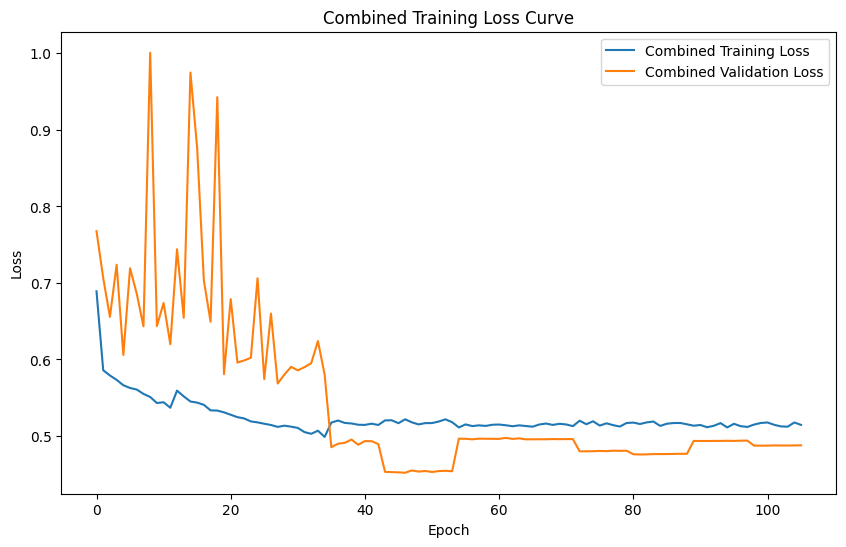

In [14]:

import matplotlib.pyplot as plt
# Plot the combined training loss curve
plt.figure(figsize=(10, 6))
plt.plot(combined_training_loss, label='Combined Training Loss')
plt.plot(combined_validation_loss, label='Combined Validation Loss')

plt.title('Combined Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

125/125 [==============================] - 0s 2ms/step
0.7479493697899023


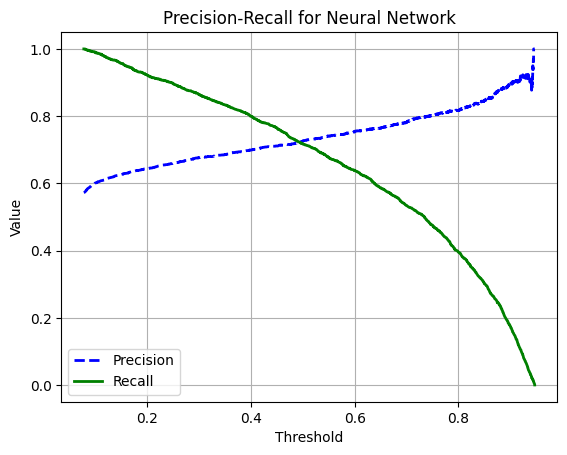

In [15]:
from sklearn.metrics import precision_recall_curve

# Assuming model is your trained neural network model and test_X is your test data
y_scores = model_CNN.predict(X_test_reshaped)  # Predict probabilities for the positive class
roc=roc_auc_score(y_test,y_scores)
print(roc)
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot precision-recall curve
plt.plot(thresholds, precision[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall[:-1], "g-", label="Recall", linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision-Recall for Neural Network')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# from keras.layers import LSTM
# # Build a neural network model with LSTM layers and dropout
# X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
# X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
# # Build the model
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation='relu', return_sequences=True))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))
# model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.4))
# model.add(Dense(25, activation='relu'))
# # Adjust the output layer for binary classification
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_train_reshaped, y_train, test_size=0.2, random_state=42)

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

# # Evaluate the model
# loss, auc = model.evaluate(X_test_reshaped, y_test)
# print(f'Test Loss: {loss:.4f}')
# print(f'Test AUC: {auc:.4f}')